# Bayesian Optimization Tutorial (Exercise): Using Ax package to tune a linear controller to stabilize a cart_pole.    
**By Wenjie Xu**

Throughout this exercise, you will see blocks of code. In some of the places, they contain an indicator:
```python
## [TODO]
```

This indicates the part of code that you need to implement yourself.  





# In this exercise, we give the objective reward function to maximize, and you are required to use Ax package to tune the linear controller. 

In [21]:
import gym
import numpy as np
from pyvirtualdisplay import Display
import time
import matplotlib.pyplot as plt
from IPython.display import Video, display, clear_output
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import moviepy.editor as mpy 
import os
from render import show_video # show video implements the visualization of frames

# The goal is to stabilize the following cart-pole, both in position and angle.

In [29]:
display(Video('./render_videos/cart_pole_play.mp4', embed=True))

In [25]:
# [TODO]: import relevant packages including Ax
# import Ax related packages


# We implement the function to evaluate reward for you. 

In [26]:
def run_cart_pole_experiment(Kp, Kd, Kpx, Kdx, num_episodes=5, max_steps=500):
    # reward function takes Kp and Kd as inputs
    
    # Initialize the CartPole environment
    env = gym.make('CartPole-v1')

    def pd_controller(state):
        # Extract the state variables
        x, x_dot, theta, theta_dot = state
    
        # PD control law
        force = Kp * theta + Kd * theta_dot + Kpx * x + Kdx * x_dot
    
        # Convert force to discrete action (left or right)
        action = 1 if force > 0 else 0
    
        return action
    
    total_reward_list = []
    for episode in range(num_episodes):
        state = env.reset()
        total_reward = 0
        frames = []
        for t in range(max_steps):
            if True:
                frame = env.render(mode='rgb_array')  # Capture frame
                frames.append(frame)
                    
            # Get action from PD controller
            action = pd_controller(state)
        
            # Step the environment
            state, reward, done, _ = env.step(action)  
            total_reward += max((reward - 70 * np.abs(state[2]) - 5 * np.abs(state[1])), 0) # penalize the pole angle and moving
        
            if done:
                break
    
        print(f"Episode {episode + 1}: Total Reward = {total_reward}")
        total_reward_list.append(total_reward)
    env.close()
    return np.min(total_reward_list), frames


In [27]:
# [TODO]: manually tune Kp and Kd yourself before call Ax package
manual_kp = 2.0
manual_kd = 1.0
manual_kpx = 2.0
manual_kdx = 1.0
mean_total_reward, frames = run_cart_pole_experiment(manual_kp, manual_kd, manual_kpx, manual_kdx, num_episodes=5)
show_video(frames)

Episode 1: Total Reward = 0
Episode 2: Total Reward = 0
Episode 3: Total Reward = 0.047575334552675486
Episode 4: Total Reward = 0
Episode 5: Total Reward = 1.2858180843759328
Moviepy - Building video ./render_videos/tmp.mp4.
Moviepy - Writing video ./render_videos/tmp.mp4



Moviepy - Done !
Moviepy - video ready ./render_videos/tmp.mp4


# Now you should implement the tuning algorithm by Ax package yourself

In [16]:
# [TODO]: define the Ax client and the interface to evaluate objective


def pd_to_frames(pd):
    kp = pd['kp']
    kd = pd['kd']
    kpx = pd['kpx']
    kdx = pd['kdx']
    mean_total_reward, frames = run_cart_pole_experiment(kp, kd, kpx, kdx, num_episodes=1)
    return frames




[INFO 06-10 17:15:19] ax.service.ax_client: Starting optimization with verbose logging. To disable logging, set the `verbose_logging` argument to `False`. Note that float values in the logs are rounded to 6 decimal points.
[INFO 06-10 17:15:19] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter kd. If that is not the expected value type, you can explicity specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 06-10 17:15:19] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter kpx. If that is not the expected value type, you can explicity specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 06-10 17:15:19] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter kdx. If that is not the expected value type, you can explicity specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 06-10 17:15:19] ax.service.u

In [17]:
# [TODO]: run the optimization loop


[INFO 06-10 17:15:27] ax.core.experiment: Attached custom parameterizations [{'kp': 0.1, 'kd': 0.1, 'kpx': 0.1, 'kdx': 0.1}] as trial 0.


Episode 1: Total Reward = 4.632190489326604
Episode 2: Total Reward = 0
Episode 3: Total Reward = 0.4565282842377201
Episode 4: Total Reward = 0


[INFO 06-10 17:15:29] ax.service.ax_client: Completed trial 0 with data: {'reward': (0.0, None)}.


Episode 5: Total Reward = 1.8465026050107554


In [18]:
# run the optimization loop
for i in range(25):
    parameters, trial_index = controller_tuner_client.get_next_trial()
    # Local evaluation here can be replaced with deployment to external system.
    controller_tuner_client.complete_trial(trial_index=trial_index, raw_data=pd_to_reward(parameters))

[INFO 06-10 17:15:32] ax.service.ax_client: Generated new trial 1 with parameters {'kp': 0.156542, 'kd': 0.29778, 'kpx': 2.585501, 'kdx': -2.780675}.


Episode 1: Total Reward = 7.441784624268621
Episode 2: Total Reward = 0.9450292265973985
Episode 3: Total Reward = 0


[INFO 06-10 17:15:33] ax.service.ax_client: Completed trial 1 with data: {'reward': (0.0, None)}.
[INFO 06-10 17:15:33] ax.service.ax_client: Generated new trial 2 with parameters {'kp': -1.146774, 'kd': -0.963856, 'kpx': -2.531612, 'kdx': -1.999371}.


Episode 4: Total Reward = 1.3513352018781006
Episode 5: Total Reward = 0
Episode 1: Total Reward = 0.04467449989169836
Episode 2: Total Reward = 0
Episode 3: Total Reward = 0
Episode 4: Total Reward = 0


[INFO 06-10 17:15:33] ax.service.ax_client: Completed trial 2 with data: {'reward': (0.0, None)}.
[INFO 06-10 17:15:33] ax.service.ax_client: Generated new trial 3 with parameters {'kp': 2.823469, 'kd': -1.276481, 'kpx': -2.87605, 'kdx': 0.826047}.


Episode 5: Total Reward = 0
Episode 1: Total Reward = 0
Episode 2: Total Reward = 0
Episode 3: Total Reward = 0


[INFO 06-10 17:15:34] ax.service.ax_client: Completed trial 3 with data: {'reward': (0, None)}.
[INFO 06-10 17:15:34] ax.service.ax_client: Generated new trial 4 with parameters {'kp': -0.585537, 'kd': 1.110007, 'kpx': -0.552013, 'kdx': -1.005763}.


Episode 4: Total Reward = 0
Episode 5: Total Reward = 0
Episode 1: Total Reward = 0
Episode 2: Total Reward = 0
Episode 3: Total Reward = 0
Episode 4: Total Reward = 0.08854820765554905


[INFO 06-10 17:15:34] ax.service.ax_client: Completed trial 4 with data: {'reward': (0.0, None)}.
[INFO 06-10 17:15:34] ax.service.ax_client: Generated new trial 5 with parameters {'kp': -1.52743, 'kd': -2.59898, 'kpx': 1.496221, 'kdx': -0.376886}.


Episode 5: Total Reward = 1.8242358965799212
Episode 1: Total Reward = 0
Episode 2: Total Reward = 0
Episode 3: Total Reward = 0


[INFO 06-10 17:15:35] ax.service.ax_client: Completed trial 5 with data: {'reward': (0, None)}.
[INFO 06-10 17:15:35] ax.service.ax_client: Generated new trial 6 with parameters {'kp': 2.360166, 'kd': -2.979517, 'kpx': -0.804566, 'kdx': 0.54458}.


Episode 4: Total Reward = 0
Episode 5: Total Reward = 0
Episode 1: Total Reward = 0


[INFO 06-10 17:15:35] ax.service.ax_client: Completed trial 6 with data: {'reward': (0, None)}.
[INFO 06-10 17:15:35] ax.service.ax_client: Generated new trial 7 with parameters {'kp': -2.888235, 'kd': -1.730764, 'kpx': 1.432458, 'kdx': 0.08027}.


Episode 2: Total Reward = 0
Episode 3: Total Reward = 0
Episode 4: Total Reward = 0
Episode 5: Total Reward = 0


[INFO 06-10 17:15:35] ax.service.ax_client: Completed trial 7 with data: {'reward': (0, None)}.
[INFO 06-10 17:15:35] ax.service.ax_client: Generated new trial 8 with parameters {'kp': -0.197854, 'kd': -2.016736, 'kpx': 1.836586, 'kdx': -2.937072}.


Episode 1: Total Reward = 0
Episode 2: Total Reward = 0
Episode 3: Total Reward = 0
Episode 4: Total Reward = 0
Episode 5: Total Reward = 0


[INFO 06-10 17:15:36] ax.service.ax_client: Completed trial 8 with data: {'reward': (0, None)}.
[INFO 06-10 17:15:36] ax.modelbridge.transforms.standardize_y: Outcome reward is constant, within tolerance.


Episode 1: Total Reward = 0
Episode 2: Total Reward = 0
Episode 3: Total Reward = 0
Episode 4: Total Reward = 0
Episode 5: Total Reward = 0


[INFO 06-10 17:15:36] ax.service.ax_client: Generated new trial 9 with parameters {'kp': 3.0, 'kd': 3.0, 'kpx': 3.0, 'kdx': 3.0}.


Episode 1: Total Reward = 3.089686179184355
Episode 2: Total Reward = 0
Episode 3: Total Reward = 0
Episode 4: Total Reward = 3.985600212472491


[INFO 06-10 17:15:38] ax.service.ax_client: Completed trial 9 with data: {'reward': (0.0, None)}.
[INFO 06-10 17:15:38] ax.modelbridge.transforms.standardize_y: Outcome reward is constant, within tolerance.


Episode 5: Total Reward = 0


[INFO 06-10 17:15:39] ax.service.ax_client: Generated new trial 10 with parameters {'kp': -3.0, 'kd': 3.0, 'kpx': -3.0, 'kdx': 3.0}.


Episode 1: Total Reward = 0.059845018200576305
Episode 2: Total Reward = 0
Episode 3: Total Reward = 0
Episode 4: Total Reward = 0


[INFO 06-10 17:15:41] ax.service.ax_client: Completed trial 10 with data: {'reward': (0.0, None)}.
[INFO 06-10 17:15:41] ax.modelbridge.transforms.standardize_y: Outcome reward is constant, within tolerance.


Episode 5: Total Reward = 0


[INFO 06-10 17:15:41] ax.service.ax_client: Generated new trial 11 with parameters {'kp': -3.0, 'kd': 3.0, 'kpx': 3.0, 'kdx': 3.0}.


Episode 1: Total Reward = 0
Episode 2: Total Reward = 0
Episode 3: Total Reward = 0.08095067366957664
Episode 4: Total Reward = 0.9514829171821475


[INFO 06-10 17:15:42] ax.service.ax_client: Completed trial 11 with data: {'reward': (0.0, None)}.
[INFO 06-10 17:15:42] ax.modelbridge.transforms.standardize_y: Outcome reward is constant, within tolerance.


Episode 5: Total Reward = 0


[INFO 06-10 17:15:43] ax.service.ax_client: Generated new trial 12 with parameters {'kp': -3.0, 'kd': -3.0, 'kpx': -3.0, 'kdx': 3.0}.
[INFO 06-10 17:15:43] ax.service.ax_client: Completed trial 12 with data: {'reward': (0, None)}.
[INFO 06-10 17:15:43] ax.modelbridge.transforms.standardize_y: Outcome reward is constant, within tolerance.


Episode 1: Total Reward = 0
Episode 2: Total Reward = 0
Episode 3: Total Reward = 0
Episode 4: Total Reward = 0
Episode 5: Total Reward = 0


[INFO 06-10 17:15:44] ax.service.ax_client: Generated new trial 13 with parameters {'kp': 3.0, 'kd': 3.0, 'kpx': -3.0, 'kdx': -3.0}.


Episode 1: Total Reward = 112.35160763680324
Episode 2: Total Reward = 17.00048874336062
Episode 3: Total Reward = 0


[INFO 06-10 17:15:46] ax.service.ax_client: Completed trial 13 with data: {'reward': (0.0, None)}.
[INFO 06-10 17:15:46] ax.modelbridge.transforms.standardize_y: Outcome reward is constant, within tolerance.


Episode 4: Total Reward = 8.692828512052074
Episode 5: Total Reward = 0


[INFO 06-10 17:15:46] ax.service.ax_client: Generated new trial 14 with parameters {'kp': 3.0, 'kd': 2.794381, 'kpx': -3.0, 'kdx': 3.0}.


Episode 1: Total Reward = 19.176392786670476
Episode 2: Total Reward = 32.45225625037256
Episode 3: Total Reward = 36.48918048418636
Episode 4: Total Reward = 18.720844224095345


[INFO 06-10 17:15:51] ax.service.ax_client: Completed trial 14 with data: {'reward': (18.720844, None)}.


Episode 5: Total Reward = 140.74468161838922


[INFO 06-10 17:15:52] ax.service.ax_client: Generated new trial 15 with parameters {'kp': 3.0, 'kd': 3.0, 'kpx': -2.445841, 'kdx': 3.0}.


Episode 1: Total Reward = 100.97061062885768
Episode 2: Total Reward = 108.74706109489671
Episode 3: Total Reward = 25.8870118111372
Episode 4: Total Reward = 41.52116720993945


[INFO 06-10 17:15:57] ax.service.ax_client: Completed trial 15 with data: {'reward': (25.887012, None)}.


Episode 5: Total Reward = 50.27585071694921


[INFO 06-10 17:15:59] ax.service.ax_client: Generated new trial 16 with parameters {'kp': 3.0, 'kd': 3.0, 'kpx': -1.897044, 'kdx': 3.0}.


Episode 1: Total Reward = 24.768432939614286
Episode 2: Total Reward = 45.81647721247646
Episode 3: Total Reward = 94.6618717675301
Episode 4: Total Reward = 52.33995106210932


[INFO 06-10 17:16:04] ax.service.ax_client: Completed trial 16 with data: {'reward': (24.768433, None)}.


Episode 5: Total Reward = 30.910867395083187


[INFO 06-10 17:16:05] ax.service.ax_client: Generated new trial 17 with parameters {'kp': 2.441964, 'kd': 3.0, 'kpx': -2.123347, 'kdx': 3.0}.


Episode 1: Total Reward = 22.318487207017824
Episode 2: Total Reward = 83.84996649425375
Episode 3: Total Reward = 156.70083500374403
Episode 4: Total Reward = 154.30586733664313


[INFO 06-10 17:16:10] ax.service.ax_client: Completed trial 17 with data: {'reward': (22.318487, None)}.


Episode 5: Total Reward = 39.26249273405119


[INFO 06-10 17:16:12] ax.service.ax_client: Generated new trial 18 with parameters {'kp': 3.0, 'kd': 3.0, 'kpx': -2.105731, 'kdx': 2.458643}.


Episode 1: Total Reward = 39.10932876297011
Episode 2: Total Reward = 40.970797601446975
Episode 3: Total Reward = 66.9791827043664
Episode 4: Total Reward = 77.44908105415016


[INFO 06-10 17:16:17] ax.service.ax_client: Completed trial 18 with data: {'reward': (39.109329, None)}.


Episode 5: Total Reward = 44.87581787434465


[INFO 06-10 17:16:19] ax.service.ax_client: Generated new trial 19 with parameters {'kp': 3.0, 'kd': 3.0, 'kpx': -1.97189, 'kdx': 2.232075}.


Episode 1: Total Reward = 115.37865394816617
Episode 2: Total Reward = 72.10003243281244
Episode 3: Total Reward = 106.83273351398148
Episode 4: Total Reward = 22.01699083420681


[INFO 06-10 17:16:24] ax.service.ax_client: Completed trial 19 with data: {'reward': (22.016991, None)}.


Episode 5: Total Reward = 40.15796342190151


[INFO 06-10 17:16:26] ax.service.ax_client: Generated new trial 20 with parameters {'kp': 3.0, 'kd': 2.286414, 'kpx': -2.014742, 'kdx': 2.530336}.


Episode 1: Total Reward = 63.047811102864216
Episode 2: Total Reward = 14.990832831768785
Episode 3: Total Reward = 53.627418824432425
Episode 4: Total Reward = 27.801466753910063


[INFO 06-10 17:16:30] ax.service.ax_client: Completed trial 20 with data: {'reward': (14.990833, None)}.


Episode 5: Total Reward = 71.30174817165243


[INFO 06-10 17:16:33] ax.service.ax_client: Generated new trial 21 with parameters {'kp': 3.0, 'kd': 3.0, 'kpx': -2.58411, 'kdx': 2.047122}.


Episode 1: Total Reward = 1.8760091550648212
Episode 2: Total Reward = 35.43080278409616
Episode 3: Total Reward = 39.94216005480666
Episode 4: Total Reward = 59.80438015086111


[INFO 06-10 17:16:36] ax.service.ax_client: Completed trial 21 with data: {'reward': (1.876009, None)}.


Episode 5: Total Reward = 2.743285215459764


[INFO 06-10 17:16:38] ax.service.ax_client: Generated new trial 22 with parameters {'kp': 3.0, 'kd': 3.0, 'kpx': -1.280487, 'kdx': 2.778629}.


Episode 1: Total Reward = 167.1684317440313
Episode 2: Total Reward = 175.36089323562192
Episode 3: Total Reward = 98.06432710678084
Episode 4: Total Reward = 43.656163218176516


[INFO 06-10 17:16:44] ax.service.ax_client: Completed trial 22 with data: {'reward': (43.656163, None)}.


Episode 5: Total Reward = 143.6004555464824


[INFO 06-10 17:16:46] ax.service.ax_client: Generated new trial 23 with parameters {'kp': 2.581112, 'kd': 3.0, 'kpx': -0.849783, 'kdx': 2.92799}.


Episode 1: Total Reward = 140.09535101562028
Episode 2: Total Reward = 127.51442865994613
Episode 3: Total Reward = 153.5943537780331
Episode 4: Total Reward = 136.58704801892395


[INFO 06-10 17:16:52] ax.service.ax_client: Completed trial 23 with data: {'reward': (127.514429, None)}.


Episode 5: Total Reward = 174.45809651581936


[INFO 06-10 17:16:55] ax.service.ax_client: Generated new trial 24 with parameters {'kp': 2.402967, 'kd': 3.0, 'kpx': -0.512389, 'kdx': 3.0}.


Episode 1: Total Reward = 145.47902382076063
Episode 2: Total Reward = 162.55075368014514
Episode 3: Total Reward = 130.4790095273911
Episode 4: Total Reward = 118.54519783668547


[INFO 06-10 17:17:02] ax.service.ax_client: Completed trial 24 with data: {'reward': (118.545198, None)}.


Episode 5: Total Reward = 151.87893130175507


[INFO 06-10 17:17:07] ax.service.ax_client: Generated new trial 25 with parameters {'kp': 2.422381, 'kd': 3.0, 'kpx': -0.694824, 'kdx': 3.0}.


Episode 1: Total Reward = 129.35127227134944
Episode 2: Total Reward = 131.4132220020565
Episode 3: Total Reward = 150.33554590486165
Episode 4: Total Reward = 124.2547612035014


[INFO 06-10 17:17:16] ax.service.ax_client: Completed trial 25 with data: {'reward': (124.254761, None)}.


Episode 5: Total Reward = 146.47243323165094


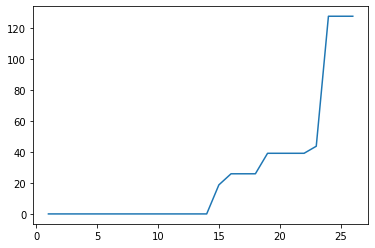

In [19]:
# [TODO] plot the optimization trace


In [2]:
# [TODO] compare the running result with the parameters tuned by you manually and the parameters obtained by Ax 

# Example code of doing visualization
# init_frames = pd_to_frames(init_parameters)
# show_video(init_frames)

In [20]:
best_frames = pd_to_frames(best_parameters)
show_video(best_frames)

Episode 1: Total Reward = 146.08241631104784
Moviepy - Building video ./render_videos/tmp.mp4.
Moviepy - Writing video ./render_videos/tmp.mp4



Moviepy - Done !
Moviepy - video ready ./render_videos/tmp.mp4
